## package pandas  

In [74]:
import pandas as ps

In [75]:
dataset = ps.read_csv("advertising.csv")

## dimension les variables

In [76]:
dataset.shape

(200, 4)

In [77]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [78]:
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [79]:
import numpy as np
X,y=dataset[['TV']], dataset[['Sales']]
## x=dataset[['TV', 'Radio']]
X = np.array(X)
X.reshape(-1,1)
y=np.array(y)
y.reshape(-1,1)
type(X)


numpy.ndarray

In [80]:
X.shape

(200, 1)

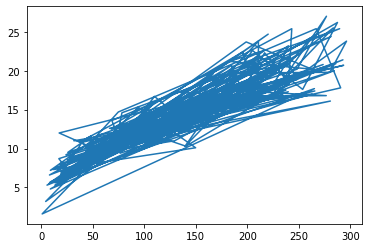

In [81]:
import matplotlib.pyplot as plt
plt.plot(X,y)

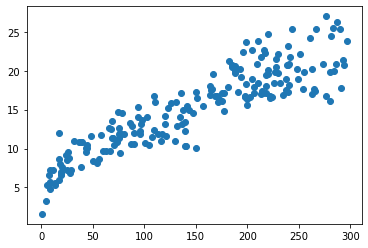

In [82]:
plt.scatter(X,y)

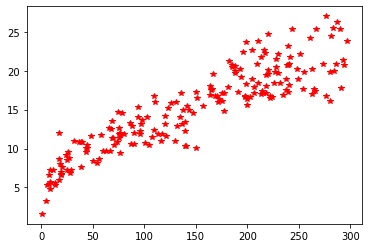

In [83]:
plt.plot(X,y,'r*')
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y,test_size=0.2,random_state=1)


### Créer le modéle de régression

In [85]:
from sklearn.linear_model import LinearRegression
h= LinearRegression()
h.fit(X_tr,y_tr)
print("l intercept={}, la pente = : {}".format(h.intercept_,h.coef_))

l intercept=[6.81903463], la pente = : [[0.05643984]]


### La prédiction

In [86]:
y_pre_tr = h.predict(X_tr)
y_pred = h.predict(X_ts) 
print(y_pre_tr.shape,y_pred.shape)

(160, 1) (40, 1)


### Tracer la droite qui represente le modèle

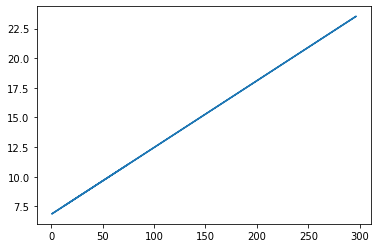

In [87]:
plt.plot(X_tr,y_pre_tr)


### La représentation graphique deux points(x1,y1) & (x1,y2)

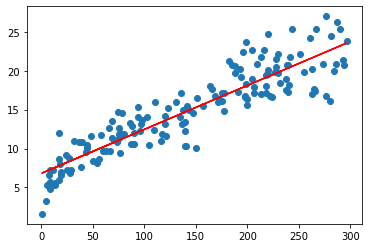

In [88]:
plt.scatter(X_tr,y_tr)
plt.plot(X_tr,y_pre_tr,'r')


In [89]:
#X_tr.head()
X_tr[0][0]


13.1

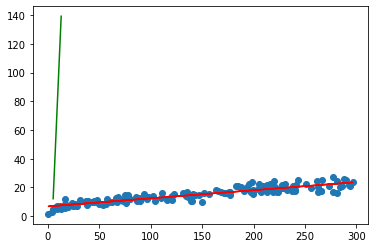

In [90]:
plt.scatter(X_tr,y_tr)
plt.plot(X_tr,y_pre_tr,'r')

plt.plot([X_tr[0][0],y_tr[0][0]],[X_tr[20][0],y_tr[20][0]],'g')

### Pourquoi l’ ́etape d’ ́evaluation d’un modèle ? par quelle mesure ?

depend de la variable cible
elle est continue
,les erreurs utilisées: MSE l'erreur quadratique moyenne, MSA l'erreur absolue moyenne

### la fonction moyenne des erreurs quadratiques. 
MSE =
1/
n
∑︁(yreal − (w0 + w1x))²

In [91]:
def mse(y,y_pr):
  return (1/y.size)*np.sum((y-y_pr)**2)

In [92]:
from sklearn import metrics


In [93]:
mse_app = metrics.mean_squared_error(y_tr,y_pre_tr)
mse_app_fn = mse(y_tr,y_pre_tr)
print("mse_app: {} et mse_app_fn:{}" .format(mse_app,mse_app_fn))

mse_app: 5.2050244431773125 et mse_app_fn:5.2050244431773125


In [94]:
def msa(y,y_pr):
  return (1/y.size)*np.sum(abs(y-y_pr))
msa_app = metrics.mean_absolute_error(y_tr,y_pre_tr)
msa_app_fn = msa(y_tr,y_pre_tr)
print("msa_app:{} et msa_app_fn:{}" .format(msa_app,msa_app_fn))

msa_app:1.812860603843324 et msa_app_fn:1.8128606038433241


### Généralisation MSE & MSA

In [95]:
mse_ts = metrics.mean_squared_error(y_ts,y_pred)
print("mse_app: {} et mse_test : {}" .format(mse_app,mse_ts))

mse_app: 5.2050244431773125 et mse_test : 5.304256414232315


#Exercice 2